Used a baseline notebook for using yolo11 to train our model for object detection. Credit to ULTRALYTICS

# Setup

Pip install `ultralytics` and [dependencies](https://github.com/ultralytics/ultralytics/blob/main/pyproject.toml) and check software and hardware.

[![PyPI - Version](https://img.shields.io/pypi/v/ultralytics?logo=pypi&logoColor=white)](https://pypi.org/project/ultralytics/) [![Downloads](https://static.pepy.tech/badge/ultralytics)](https://www.pepy.tech/projects/ultralytics) [![PyPI - Python Version](https://img.shields.io/pypi/pyversions/ultralytics?logo=python&logoColor=gold)](https://pypi.org/project/ultralytics/)

In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.2/112.6 GB disk)


# 1. Predict

YOLO11 may be used directly in the Command Line Interface (CLI) with a `yolo` command for a variety of tasks and modes and accepts additional arguments, i.e. `imgsz=640`. See a full list of available `yolo` [arguments](https://docs.ultralytics.com/usage/cfg/) and other details in the [YOLO11 Predict Docs](https://docs.ultralytics.com/modes/train/).


In [ ]:
# Run inference on an image with YOLO11n
!yolo predict model=yolo11n.pt source='https://ultralytics.com/images/zidane.jpg'

100% 5.35M/5.35M [00:00<00:00, 96.6MB/s]
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs

100% 49.2k/49.2k [00:00<00:00, 6.50MB/s]
image 1/1 /content/zidane.jpg: 384x640 2 persons, 1 tie, 44.9ms
Speed: 13.1ms preprocess, 44.9ms inference, 334.2ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


# 2. Val
Validate a model's accuracy on the [COCO](https://docs.ultralytics.com/datasets/detect/coco/) dataset's `val` or `test` splits. The latest YOLO11 [models](https://github.com/ultralytics/ultralytics#models) are downloaded automatically the first time they are used. See [YOLO11 Val Docs](https://docs.ultralytics.com/modes/val/) for more information.

In [ ]:
# Download COCO val
import torch
torch.hub.download_url_to_file('https://ultralytics.com/assets/coco2017val.zip', 'tmp.zip')  # download (780M - 5000 images)
!unzip -q tmp.zip -d datasets && rm tmp.zip  # unzip

100%|██████████| 780M/780M [00:09<00:00, 83.6MB/s]


In [ ]:
# Validate YOLO11n on COCO8 val
!yolo val model=yolo11n.pt data=coco8.yaml

Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs

Dataset 'coco8.yaml' images not found ⚠️, missing path '/content/datasets/coco8/images/val'
100% 433k/433k [00:00<00:00, 15.1MB/s]
Unzipping /content/datasets/coco8.zip to /content/datasets/coco8...: 100% 25/25 [00:00<00:00, 4896.46file/s]
Dataset download success ✅ (1.3s), saved to /content/datasets

100% 755k/755k [00:00<00:00, 18.8MB/s]
val: Scanning /content/datasets/coco8/labels/val... 4 images, 0 backgrounds, 0 corrupt: 100% 4/4 [00:00<00:00, 107.00it/s]
val: New cache created: /content/datasets/coco8/labels/val.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:01<00:00,  1.52s/it]
                   all          4         17       0.57       0.85      0.847      0.632
                person          3         10      0.557        0.6      0.585      0.272
  

# 3. Train

<p align=""><a href="https://ultralytics.com/hub"><img width="1000" src="https://github.com/ultralytics/assets/raw/main/yolov8/banner-integrations.png"/></a></p>

Train YOLO11 on [Detect](https://docs.ultralytics.com/tasks/detect/), [Segment](https://docs.ultralytics.com/tasks/segment/), [Classify](https://docs.ultralytics.com/tasks/classify/) and [Pose](https://docs.ultralytics.com/tasks/pose/) datasets. See [YOLO11 Train Docs](https://docs.ultralytics.com/modes/train/) for more information.

In [ ]:
#@title Select YOLO11 🚀 logger {run: 'auto'}
logger = 'Comet' #@param ['Comet', 'TensorBoard']

if logger == 'Comet':
  %pip install -q comet_ml
  import comet_ml; comet_ml.init()
elif logger == 'TensorBoard':
  %load_ext tensorboard
  %tensorboard --logdir .

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 717.3/717.3 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 979.7/979.7 kB 45.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 92.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.8/144.8 kB 15.5 MB/s eta 0:00:00


COMET WARNING: comet_ml.init() is deprecated and will be removed soon. Please use comet_ml.login()


Please paste your Comet API key from https://www.comet.com/api/my/settings/
(api key may not show as you type)
Comet API key: ··········


COMET INFO: Valid Comet API Key saved in /root/.comet.config (set COMET_CONFIG to change where it is saved).


In [ ]:
# Train YOLO11n on COCO8 for 3 epochs
!yolo train model=yolo11n.pt data=coco8.yaml epochs=3 imgsz=640

Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=coco8.yaml, epochs=3, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width

# 4. Export

Export a YOLO11 model to any supported format below with the `format` argument, i.e. `format=onnx`. See [YOLO11 Export Docs](https://docs.ultralytics.com/modes/export/) for more information.

- 💡 ProTip: Export to [ONNX](https://docs.ultralytics.com/integrations/onnx/) or [OpenVINO](https://docs.ultralytics.com/integrations/openvino/) for up to 3x CPU speedup.  
- 💡 ProTip: Export to [TensorRT](https://docs.ultralytics.com/integrations/tensorrt/) for up to 5x GPU speedup.

| Format                                                                   | `format` Argument | Model                     | Metadata | Arguments                                                            |
|--------------------------------------------------------------------------|-------------------|---------------------------|----------|----------------------------------------------------------------------|
| [PyTorch](https://pytorch.org/)                                          | -                 | `yolo11n.pt`              | ✅        | -                                                                    |
| [TorchScript](https://docs.ultralytics.com/integrations/torchscript)     | `torchscript`     | `yolo11n.torchscript`     | ✅        | `imgsz`, `optimize`, `batch`                                         |
| [ONNX](https://docs.ultralytics.com/integrations/onnx)                   | `onnx`            | `yolo11n.onnx`            | ✅        | `imgsz`, `half`, `dynamic`, `simplify`, `opset`, `batch`             |
| [OpenVINO](https://docs.ultralytics.com/integrations/openvino)           | `openvino`        | `yolo11n_openvino_model/` | ✅        | `imgsz`, `half`, `dynamic`, `int8`, `batch`, `data`                  |
| [TensorRT](https://docs.ultralytics.com/integrations/tensorrt)           | `engine`          | `yolo11n.engine`          | ✅        | `imgsz`, `half`, `dynamic`, `simplify`, `workspace`, `int8`, `batch`, `data` |
| [CoreML](https://docs.ultralytics.com/integrations/coreml)               | `coreml`          | `yolo11n.mlpackage`       | ✅        | `imgsz`, `half`, `int8`, `nms`, `batch`                              |
| [TF SavedModel](https://docs.ultralytics.com/integrations/tf-savedmodel) | `saved_model`     | `yolo11n_saved_model/`    | ✅        | `imgsz`, `keras`, `int8`, `batch`                                    |
| [TF GraphDef](https://docs.ultralytics.com/integrations/tf-graphdef)     | `pb`              | `yolo11n.pb`              | ❌        | `imgsz`, `batch`                                                     |
| [TF Lite](https://docs.ultralytics.com/integrations/tflite)              | `tflite`          | `yolo11n.tflite`          | ✅        | `imgsz`, `half`, `int8`, `batch`, `data`                             |
| [TF Edge TPU](https://docs.ultralytics.com/integrations/edge-tpu)        | `edgetpu`         | `yolo11n_edgetpu.tflite`  | ✅        | `imgsz`                                                              |
| [TF.js](https://docs.ultralytics.com/integrations/tfjs)                  | `tfjs`            | `yolo11n_web_model/`      | ✅        | `imgsz`, `half`, `int8`, `batch`                                     |
| [PaddlePaddle](https://docs.ultralytics.com/integrations/paddlepaddle)   | `paddle`          | `yolo11n_paddle_model/`   | ✅        | `imgsz`, `batch`                                                     |
| [MNN](https://docs.ultralytics.com/integrations/mnn)                     | `mnn`             | `yolo11n.mnn`             | ✅        | `imgsz`, `batch`, `int8`, `half`                                     |
| [NCNN](https://docs.ultralytics.com/integrations/ncnn)                   | `ncnn`            | `yolo11n_ncnn_model/`     | ✅        | `imgsz`, `half`, `batch`                                             |
| [IMX500](https://docs.ultralytics.com/integrations/sony-imx500)          | `imx`             | `yolov8n_imx_model/`      | ✅        | `imgsz`, `int8`, `data`                                              |
| [RKNN](https://docs.ultralytics.com/integrations/rockchip-rknn)          | `rknn`            | `yolo11n_rknn_model/`     | ✅        | `imgsz`, `batch`, `name`                                             |

In [ ]:
!yolo export model=yolo11n.pt format=torchscript

Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.00GHz)
YOLO11n summary (fused): 100 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs

PyTorch: starting from 'yolo11n.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (5.4 MB)

TorchScript: starting export with torch 2.5.1+cu124...
TorchScript: export success ✅ 6.1s, saved as 'yolo11n.torchscript' (10.5 MB)

Export complete (9.0s)
Results saved to /content
Predict:         yolo predict task=detect model=yolo11n.torchscript imgsz=640  
Validate:        yolo val task=detect model=yolo11n.torchscript imgsz=640 data=/usr/src/ultralytics/ultralytics/cfg/datasets/coco.yaml  
Visualize:       https://netron.app
💡 Learn more at https://docs.ultralytics.com/modes/export


# 5. Python Usage

YOLO11 was reimagined using Python-first principles for the most seamless Python YOLO experience yet. YOLO11 models can be loaded from a trained checkpoint or created from scratch. Then methods are used to train, val, predict, and export the model. See detailed Python usage examples in the [YOLO11 Python Docs](https://docs.ultralytics.com/usage/python/).

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolo11n.yaml')  # build a new model from scratch
model = YOLO('yolo11n.pt')  # load a pretrained model (recommended for training)

# Use the model
results = model.train(data='coco8.yaml', epochs=3)  # train the model
results = model.val()  # evaluate model performance on the validation set
results = model("/content/setting.jpg")  # predict on an image
results = model.export(format='onnx')  # export the model to ONNX format

Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=coco8.yaml, epochs=3, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_widt

COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: torch.
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/atkhater/general/e9c5a7e094114200ab81a502349d5cb6

COMET INFO: Couldn't find a Git repository in '/content' nor in any parent directory. Set `COMET_GIT_DIRECTORY` if your Git Repository is elsewhere.


TensorBoard: Start with 'tensorboard --logdir runs/detect/train2', view at http://localhost:6006/
Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed ✅


train: Scanning /content/datasets/coco8/labels/train.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/datasets/coco8/labels/val.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3     0.689G     0.9753      2.326      1.291         18        640: 100%|██████████| 1/1 [00:00<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.09it/s]


                   all          4         17      0.586       0.85      0.878      0.634

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3     0.664G      1.299      3.249      1.677         22        640: 100%|██████████| 1/1 [00:00<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.06it/s]

                   all          4         17      0.592       0.85      0.848       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3     0.656G      1.354      2.837      1.479         27        640: 100%|██████████| 1/1 [00:00<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.47it/s]

                   all          4         17      0.575       0.85       0.85      0.649



3 epochs completed in 0.002 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 5.5MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 19.75it/s]


                   all          4         17      0.575       0.85       0.85      0.632
                person          3         10      0.573        0.6      0.594      0.274
                   dog          1          1      0.548          1      0.995      0.796
                 horse          1          2      0.556          1      0.995      0.674
              elephant          1          2      0.361        0.5      0.524      0.259
              umbrella          1          1      0.567          1      0.995      0.895
          potted plant          1          1      0.848          1      0.995      0.895
Speed: 0.3ms preprocess, 4.6ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/train2


COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : practical_sap_4910
COMET INFO:     url                   : https://www.comet.com/atkhater/general/e9c5a7e094114200ab81a502349d5cb6
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     lr/pg0 [7]               : (0.0, 8.092e-07)
COMET INFO:     lr/pg1 [7]               : (0.0, 8.092e-07)
COMET INFO:     lr/pg2 [7]               : (0.0, 8.092e-07)
COMET INFO:     metrics/mAP50(B) [8]     : (0.84824, 0.87795)
COMET INFO:     metrics/mAP50-95(B) [8]  : (0.63027, 0.64906)
COMET INFO:     metrics/precision(B) [8] : (0.57478, 0.5919)
COMET INFO:     metrics/recall(B)        : 0.85
COMET INFO:     model/GFLOPs             : 6.614
COMET INFO:     model/p

Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs


val: Scanning /content/datasets/coco8/labels/val.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.08it/s]


                   all          4         17      0.574       0.85       0.85      0.653
                person          3         10      0.571        0.6      0.594      0.295
                   dog          1          1      0.546          1      0.995      0.796
                 horse          1          2      0.552          1      0.995      0.674
              elephant          1          2      0.359        0.5      0.525       0.26
              umbrella          1          1      0.566          1      0.995      0.995
          potted plant          1          1      0.847          1      0.995      0.895
Speed: 0.3ms preprocess, 15.8ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/train22

image 1/1 /content/setting.jpg: 512x640 1 fork, 1 knife, 1 spoon, 1 bowl, 1 dining table, 50.5ms
Speed: 4.0ms preprocess, 50.5ms inference, 1.5ms postprocess per image at shape (1, 3, 512, 640)
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Int

# 6. Tasks

YOLO11 can train, val, predict and export models for the most common tasks in vision AI: [Detect](https://docs.ultralytics.com/tasks/detect/), [Segment](https://docs.ultralytics.com/tasks/segment/), [Classify](https://docs.ultralytics.com/tasks/classify/) and [Pose](https://docs.ultralytics.com/tasks/pose/). See [YOLO11 Tasks Docs](https://docs.ultralytics.com/tasks/) for more information.

<br><img width="1024" src="https://raw.githubusercontent.com/ultralytics/assets/main/im/banner-tasks.png">


## 1. Detection

YOLO11 _detection_ models have no suffix and are the default YOLO11 models, i.e. `yolo11n.pt` and are pretrained on COCO. See [Detection Docs](https://docs.ultralytics.com/tasks/detect/) for full details.


In [ ]:
# Load YOLO11n, train it on COCO128 for 3 epochs and predict an image with it
from ultralytics import YOLO

model = YOLO('yolo11n.pt')  # load a pretrained YOLO detection model
model.train(data='coco8.yaml', epochs=3)  # train the model
model("/content/setting.jpg")  # predict on an image

Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=coco8.yaml, epochs=3, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_widt

COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: torch.
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repository in '/content' nor in any parent directory. Set `COMET_GIT_DIRECTORY` if your Git Repository is elsewhere.
COMET INFO: Experiment is live on comet.com https://www.comet.com/atkhater/general/0d4a221111814fb9a18996702d1a1bce



TensorBoard: Start with 'tensorboard --logdir runs/detect/train3', view at http://localhost:6006/
Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed ✅


train: Scanning /content/datasets/coco8/labels/train.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/datasets/coco8/labels/val.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<?, ?it/s]


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3     0.682G     0.9753      2.326      1.291         18        640: 100%|██████████| 1/1 [00:00<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.79it/s]

                   all          4         17      0.586       0.85      0.878      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3     0.664G      1.299      3.249      1.677         22        640: 100%|██████████| 1/1 [00:00<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.19it/s]

                   all          4         17      0.592       0.85      0.848       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3     0.664G      1.354      2.837      1.479         27        640: 100%|██████████| 1/1 [00:00<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.15it/s]

                   all          4         17      0.575       0.85       0.85      0.649



3 epochs completed in 0.002 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 5.5MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 20.67it/s]


                   all          4         17      0.575       0.85       0.85      0.632
                person          3         10      0.573        0.6      0.594      0.274
                   dog          1          1      0.548          1      0.995      0.796
                 horse          1          2      0.556          1      0.995      0.674
              elephant          1          2      0.361        0.5      0.524      0.259
              umbrella          1          1      0.567          1      0.995      0.895
          potted plant          1          1      0.848          1      0.995      0.895
Speed: 0.4ms preprocess, 4.3ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/train3


COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : developing_panther_1033
COMET INFO:     url                   : https://www.comet.com/atkhater/general/0d4a221111814fb9a18996702d1a1bce
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     lr/pg0 [7]               : (0.0, 8.092e-07)
COMET INFO:     lr/pg1 [7]               : (0.0, 8.092e-07)
COMET INFO:     lr/pg2 [7]               : (0.0, 8.092e-07)
COMET INFO:     metrics/mAP50(B) [8]     : (0.84824, 0.87795)
COMET INFO:     metrics/mAP50-95(B) [8]  : (0.63027, 0.64906)
COMET INFO:     metrics/precision(B) [8] : (0.57478, 0.5919)
COMET INFO:     metrics/recall(B)        : 0.85
COMET INFO:     model/GFLOPs             : 6.614
COMET INFO:     mo


image 1/1 /content/setting.jpg: 512x640 1 fork, 1 knife, 1 spoon, 1 bowl, 1 dining table, 19.4ms
Speed: 4.0ms preprocess, 19.4ms inference, 2.0ms postprocess per image at shape (1, 3, 512, 640)


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

## 2. Segmentation

YOLO11 _segmentation_ models use the `-seg` suffix, i.e. `yolo11n-seg.pt` and are pretrained on COCO. See [Segmentation Docs](https://docs.ultralytics.com/tasks/segment/) for full details.


In [ ]:
# Load YOLO11n-seg, train it on COCO128-seg for 3 epochs and predict an image with it
from ultralytics import YOLO

model = YOLO('yolo11n-seg.pt')  # load a pretrained YOLO segmentation model
model.train(data='coco8-seg.yaml', epochs=3)  # train the model
model("/content/setting.jpg")  # predict on an image

100%|██████████| 5.90M/5.90M [00:00<00:00, 83.2MB/s]


Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=segment, mode=train, model=yolo11n-seg.pt, data=coco8-seg.yaml, epochs=3, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, l

100%|██████████| 439k/439k [00:00<00:00, 14.9MB/s]
Unzipping /content/datasets/coco8-seg.zip to /content/datasets/coco8-seg...: 100%|██████████| 25/25 [00:00<00:00, 1524.65file/s]

Dataset download success ✅ (0.9s), saved to /content/datasets


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1 

 23        [16, 19, 22]  1    717680  ultralytics.nn.modules.head.Segment          [80, 32, 64, [64, 128, 256]]  
YOLO11n-seg summary: 203 layers, 2,876,848 parameters, 2,876,832 gradients, 10.5 GFLOPs

Transferred 561/561 items from pretrained weights


COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: torch.
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/atkhater/general/7b9d95d676ea486c9a913a1ec6f8b980

COMET INFO: Couldn't find a Git repository in '/content' nor in any parent directory. Set `COMET_GIT_DIRECTORY` if your Git Repository is elsewhere.


TensorBoard: Start with 'tensorboard --logdir runs/segment/train', view at http://localhost:6006/
Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed ✅


train: Scanning /content/datasets/coco8-seg/labels/train... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<00:00, 1299.15it/s]

train: New cache created: /content/datasets/coco8-seg/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/datasets/coco8-seg/labels/val... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<00:00, 2962.60it/s]

val: New cache created: /content/datasets/coco8-seg/labels/val.cache


Plotting labels to runs/segment/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 90 weight(decay=0.0), 101 weight(decay=0.0005), 100 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/train
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        1/3     0.934G      1.096       2.13      2.753      1.367         19        640: 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.00it/s]

                   all          4         17      0.799       0.89      0.939      0.666      0.742      0.833      0.821      0.567



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        2/3     0.885G      1.088      3.382      2.965      1.438         23        640: 100%|██████████| 1/1 [00:00<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.21it/s]


                   all          4         17      0.784      0.896      0.939      0.663      0.725      0.838      0.822      0.565

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        3/3     0.865G       1.09      2.869      2.837      1.278         27        640: 100%|██████████| 1/1 [00:00<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.31it/s]


                   all          4         17      0.782      0.897      0.939       0.67      0.723      0.838      0.821      0.565

3 epochs completed in 0.003 hours.
Optimizer stripped from runs/segment/train/weights/last.pt, 6.1MB
Optimizer stripped from runs/segment/train/weights/best.pt, 6.1MB

Validating runs/segment/train/weights/best.pt...
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n-seg summary (fused): 113 layers, 2,868,664 parameters, 0 gradients, 10.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.72it/s]


                   all          4         17      0.783      0.895      0.938      0.671      0.724      0.837      0.821      0.564
                person          3         10      0.721       0.52      0.655      0.319      0.721       0.52      0.614      0.246
                   dog          1          1      0.744          1      0.995      0.895      0.744          1      0.995      0.895
                 horse          1          2       0.63          1      0.995      0.581       0.63          1      0.828        0.2
              elephant          1          2          1      0.851      0.995      0.341      0.649        0.5        0.5       0.25
              umbrella          1          1      0.672          1      0.995      0.995      0.672          1      0.995      0.895
          potted plant          1          1      0.928          1      0.995      0.895      0.928          1      0.995      0.895
Speed: 0.3ms preprocess, 10.2ms inference, 0.0ms loss, 3.2ms postproc

COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : lime_wasp_7994
COMET INFO:     url                   : https://www.comet.com/atkhater/general/7b9d95d676ea486c9a913a1ec6f8b980
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     lr/pg0 [7]               : (0.0, 8.092e-07)
COMET INFO:     lr/pg1 [7]               : (0.0, 8.092e-07)
COMET INFO:     lr/pg2 [7]               : (0.0, 8.092e-07)
COMET INFO:     metrics/mAP50(B) [8]     : (0.9383028998875536, 0.9391)
COMET INFO:     metrics/mAP50(M) [8]     : (0.82118, 0.82154)
COMET INFO:     metrics/mAP50-95(B) [8]  : (0.6631, 0.6712100285924893)
COMET INFO:     metrics/mAP50-95(M) [8]  : (0.5636612404684096, 0.56661)
COMET INFO:     metrics/precis


image 1/1 /content/setting.jpg: 512x640 2 forks, 1 knife, 1 spoon, 1 dining table, 23.1ms
Speed: 2.4ms preprocess, 23.1ms inference, 15.1ms postprocess per image at shape (1, 3, 512, 640)


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: ultralytics.engine.results.Masks object
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 

## 3. Classification

YOLO11 _classification_ models use the `-cls` suffix, i.e. `yolo11n-cls.pt` and are pretrained on ImageNet. See [Classification Docs](https://docs.ultralytics.com/tasks/classify/) for full details.


In [ ]:
# Load YOLO11n-cls, train it on mnist160 for 3 epochs and predict an image with it
from ultralytics import YOLO

model = YOLO('yolo11n-cls.pt')  # load a pretrained YOLO classification model
model.train(data='mnist160', epochs=3)  # train the model
model("/content/setting.jpg")  # predict on an image

100%|██████████| 5.52M/5.52M [00:00<00:00, 96.0MB/s]

Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=classify, mode=train, model=yolo11n-cls.pt, data=mnist160, epochs=3, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_w


100%|██████████| 70.0k/70.0k [00:00<00:00, 6.04MB/s]
Unzipping /content/datasets/mnist160.zip to /content/datasets/mnist160...: 100%|██████████| 184/184 [00:00<00:00, 5409.88file/s]

Dataset download success ✅ (0.8s), saved to /content/datasets/mnist160

train: /content/datasets/mnist160/train... found 80 images in 10 classes ✅ 
val: None...
test: /content/datasets/mnist160/test... found 80 images in 10 classes ✅ 
Overriding model.yaml nc=80 with nc=10

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ult

YOLO11n-cls summary: 86 layers, 1,543,914 parameters, 1,543,914 gradients, 3.3 GFLOPs
Transferred 234/236 items from pretrained weights


COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: torch.
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/atkhater/general/140a73cbd99e4779b192b1690ae09019

COMET INFO: Couldn't find a Git repository in '/content' nor in any parent directory. Set `COMET_GIT_DIRECTORY` if your Git Repository is elsewhere.


TensorBoard: Start with 'tensorboard --logdir runs/classify/train', view at http://localhost:6006/
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed ✅


train: Scanning /content/datasets/mnist160/train... 80 images, 0 corrupt: 100%|██████████| 80/80 [00:00<00:00, 7660.83it/s]

train: New cache created: /content/datasets/mnist160/train.cache



val: Scanning /content/datasets/mnist160/test... 80 images, 0 corrupt: 100%|██████████| 80/80 [00:00<00:00, 11508.19it/s]

val: New cache created: /content/datasets/mnist160/test.cache


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 39 weight(decay=0.0), 40 weight(decay=0.0005), 40 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/classify/train
Starting training for 3 epochs...

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 19.52it/s]

                   all        0.1      0.488



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 21.51it/s]

                   all      0.138        0.5



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 27.73it/s]

                   all       0.05      0.538



3 epochs completed in 0.002 hours.
Optimizer stripped from runs/classify/train/weights/last.pt, 3.2MB
Optimizer stripped from runs/classify/train/weights/best.pt, 3.2MB

Validating runs/classify/train/weights/best.pt...
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n-cls summary (fused): 47 layers, 1,538,834 parameters, 0 gradients, 3.2 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /content/datasets/mnist160/train... found 80 images in 10 classes ✅ 
val: None...
test: /content/datasets/mnist160/test... found 80 images in 10 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 20.88it/s]


                   all      0.138      0.512
Speed: 0.1ms preprocess, 0.9ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train


COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : vital_desert_4558
COMET INFO:     url                   : https://www.comet.com/atkhater/general/140a73cbd99e4779b192b1690ae09019
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     lr/pg0 [7]                : (2.856e-05, 4.3054200000000005e-05)
COMET INFO:     lr/pg1 [7]                : (2.856e-05, 4.3054200000000005e-05)
COMET INFO:     lr/pg2 [7]                : (2.856e-05, 4.3054200000000005e-05)
COMET INFO:     metrics/accuracy_top1 [8] : (0.05, 0.13750000298023224)
COMET INFO:     metrics/accuracy_top5 [8] : (0.4875, 0.5375)
COMET INFO:     model/GFLOPs              : 3.263
COMET INFO:     model/parameters          : 1543914
COMET INFO:


image 1/1 /content/setting.jpg: 224x224 8 0.19, 6 0.17, 1 0.15, 7 0.13, 4 0.10, 4.5ms
Speed: 8.2ms preprocess, 4.5ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)


[ultralytics.engine.results.Results object with attributes:
 
 boxes: None
 keypoints: None
 masks: None
 names: {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9'}
 obb: None
 orig_img: array([[[ 49,  74, 100],
         [ 36,  61,  87],
         [ 68,  93, 119],
         ...,
         [ 49,  55,  78],
         [ 39,  46,  66],
         [ 37,  44,  64]],
 
        [[ 51,  76, 102],
         [ 39,  64,  90],
         [ 69,  94, 120],
         ...,
         [ 48,  54,  77],
         [ 39,  46,  66],
         [ 37,  44,  64]],
 
        [[ 48,  73,  99],
         [ 37,  62,  88],
         [ 66,  91, 117],
         ...,
         [ 45,  51,  74],
         [ 36,  41,  62],
         [ 34,  39,  60]],
 
        ...,
 
        [[ 63,  92, 119],
         [ 63,  92, 119],
         [ 66,  94, 125],
         ...,
         [ 89, 115, 145],
         [ 86, 115, 142],
         [ 86, 115, 142]],
 
        [[ 62,  91, 118],
         [ 63,  92, 119],
         [ 63,  92, 123],


## 4. Pose

YOLO11 _pose_ models use the `-pose` suffix, i.e. `yolo11n-pose.pt` and are pretrained on COCO Keypoints. See [Pose Docs](https://docs.ultralytics.com/tasks/pose/) for full details.

In [ ]:
# Load YOLO11n-pose, train it on COCO8-pose for 3 epochs and predict an image with it
from ultralytics import YOLO

model = YOLO('yolo11n-pose.pt')  # load a pretrained YOLO pose model
model.train(data='coco8-pose.yaml', epochs=3)  # train the model
model("/content/setting.jpg")  # predict on an image

100%|██████████| 5.97M/5.97M [00:00<00:00, 104MB/s]

Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=pose, mode=train, model=yolo11n-pose.pt, data=coco8-pose.yaml, epochs=3, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, li


100%|██████████| 334k/334k [00:00<00:00, 10.2MB/s]
Unzipping /content/datasets/coco8-pose.zip to /content/datasets/coco8-pose...: 100%|██████████| 27/27 [00:00<00:00, 4014.26file/s]

Dataset download success ✅ (0.9s), saved to /content/datasets

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, Tru

YOLO11n-pose summary: 196 layers, 2,874,462 parameters, 2,874,446 gradients, 7.5 GFLOPs

Transferred 541/541 items from pretrained weights


COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: torch.
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/atkhater/general/7267087849944e4f88674b67d0e6a0c8

COMET INFO: Couldn't find a Git repository in '/content' nor in any parent directory. Set `COMET_GIT_DIRECTORY` if your Git Repository is elsewhere.


TensorBoard: Start with 'tensorboard --logdir runs/pose/train', view at http://localhost:6006/
Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed ✅


train: Scanning /content/datasets/coco8-pose/labels/train... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<00:00, 927.74it/s]

train: New cache created: /content/datasets/coco8-pose/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/datasets/coco8-pose/labels/val... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<00:00, 400.59it/s]

val: New cache created: /content/datasets/coco8-pose/labels/val.cache


Plotting labels to runs/pose/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 87 weight(decay=0.0), 97 weight(decay=0.0005), 96 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/pose/train
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


        1/3     0.682G      1.301      3.165     0.4364      1.014      1.557         11        640: 100%|██████████| 1/1 [00:00<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.28it/s]

                   all          4         14      0.805      0.888      0.907      0.728      0.983      0.643      0.763      0.356



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


        2/3     0.633G       1.67      4.103     0.3852      1.164      1.554          9        640: 100%|██████████| 1/1 [00:00<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.52it/s]

                   all          4         14      0.805      0.884      0.907      0.713      0.982      0.643      0.763       0.36



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


        3/3     0.635G      1.411      3.936     0.4954      1.615      1.475         17        640: 100%|██████████| 1/1 [00:00<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.90it/s]

                   all          4         14      0.809      0.857      0.907      0.711      0.982      0.643      0.763      0.352



3 epochs completed in 0.003 hours.
Optimizer stripped from runs/pose/train/weights/last.pt, 6.1MB
Optimizer stripped from runs/pose/train/weights/best.pt, 6.1MB

Validating runs/pose/train/weights/best.pt...
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n-pose summary (fused): 109 layers, 2,866,468 parameters, 0 gradients, 7.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 17.43it/s]


                   all          4         14      0.806      0.889      0.907      0.713      0.983      0.643      0.763      0.356
Speed: 0.3ms preprocess, 5.1ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/pose/train


COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : beneficial_fox_7695
COMET INFO:     url                   : https://www.comet.com/atkhater/general/7267087849944e4f88674b67d0e6a0c8
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     lr/pg0 [7]               : (0.0, 1.36e-05)
COMET INFO:     lr/pg1 [7]               : (0.0, 1.36e-05)
COMET INFO:     lr/pg2 [7]               : (0.0, 1.36e-05)
COMET INFO:     metrics/mAP50(B) [8]     : (0.90686, 0.90712)
COMET INFO:     metrics/mAP50(P) [8]     : (0.76272, 0.7627806529764654)
COMET INFO:     metrics/mAP50-95(B) [8]  : (0.71054, 0.72775)
COMET INFO:     metrics/mAP50-95(P) [8]  : (0.35224, 0.36037)
COMET INFO:     metrics/precision(B) [8] : (0.80


image 1/1 /content/setting.jpg: 512x640 (no detections), 24.6ms
Speed: 4.0ms preprocess, 24.6ms inference, 0.7ms postprocess per image at shape (1, 3, 512, 640)


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: ultralytics.engine.results.Keypoints object
 masks: None
 names: {0: 'person'}
 obb: None
 orig_img: array([[[ 49,  74, 100],
         [ 36,  61,  87],
         [ 68,  93, 119],
         ...,
         [ 49,  55,  78],
         [ 39,  46,  66],
         [ 37,  44,  64]],
 
        [[ 51,  76, 102],
         [ 39,  64,  90],
         [ 69,  94, 120],
         ...,
         [ 48,  54,  77],
         [ 39,  46,  66],
         [ 37,  44,  64]],
 
        [[ 48,  73,  99],
         [ 37,  62,  88],
         [ 66,  91, 117],
         ...,
         [ 45,  51,  74],
         [ 36,  41,  62],
         [ 34,  39,  60]],
 
        ...,
 
        [[ 63,  92, 119],
         [ 63,  92, 119],
         [ 66,  94, 125],
         ...,
         [ 89, 115, 145],
         [ 86, 115, 142],
         [ 86, 115, 142]],
 
        [[ 62,  91, 118],
         [ 63,  92, 119],
         [ 63,  92,

## 4. Oriented Bounding Boxes (OBB)

YOLO11 _OBB_ models use the `-obb` suffix, i.e. `yolo11n-obb.pt` and are pretrained on the DOTA dataset. See [OBB Docs](https://docs.ultralytics.com/tasks/obb/) for full details.

In [ ]:
# Load YOLO11n-obb, train it on DOTA8 for 3 epochs and predict an image with it
from ultralytics import YOLO

model = YOLO('yolo11n-obb.pt')  # load a pretrained YOLO OBB model
model.train(data='dota8.yaml', epochs=3)  # train the model
model("/content/setting.jpg")  # predict on an image

100%|██████████| 5.53M/5.53M [00:00<00:00, 86.2MB/s]

Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=obb, mode=train, model=yolo11n-obb.pt, data=dota8.yaml, epochs=3, time=None, patience=100, batch=16, imgsz=1024, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_wid


100%|██████████| 1.24M/1.24M [00:00<00:00, 25.4MB/s]
Unzipping /content/datasets/dota8.zip to /content/datasets/dota8...: 100%|██████████| 27/27 [00:00<00:00, 1929.43file/s]

Dataset download success ✅ (0.9s), saved to /content/datasets

Overriding model.yaml nc=80 with nc=15

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, Tr

YOLO11n-obb summary: 196 layers, 2,664,432 parameters, 2,664,416 gradients, 6.7 GFLOPs

Transferred 541/541 items from pretrained weights


COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: torch.
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/atkhater/general/524c66ab2aaf4f97afde5310bd25699b

COMET INFO: Couldn't find a Git repository in '/content' nor in any parent directory. Set `COMET_GIT_DIRECTORY` if your Git Repository is elsewhere.


TensorBoard: Start with 'tensorboard --logdir runs/obb/train', view at http://localhost:6006/
Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed ✅


train: Scanning /content/datasets/dota8/labels/train... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<00:00, 1271.58it/s]

train: New cache created: /content/datasets/dota8/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/datasets/dota8/labels/val... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<00:00, 2684.35it/s]


val: New cache created: /content/datasets/dota8/labels/val.cache
Plotting labels to runs/obb/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 87 weight(decay=0.0), 97 weight(decay=0.0005), 96 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 1024 train, 1024 val
Using 2 dataloader workers
Logging results to runs/obb/train
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3      1.55G     0.7456     0.6184      1.609         72       1024: 100%|██████████| 1/1 [00:00<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.64it/s]

                   all          4          8      0.946          1      0.995      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3       1.6G     0.8826     0.5478       1.49        143       1024: 100%|██████████| 1/1 [00:00<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.17it/s]

                   all          4          8      0.945          1      0.995      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3      1.52G     0.5578     0.4606      1.086         95       1024: 100%|██████████| 1/1 [00:00<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.07it/s]

                   all          4          8      0.959          1      0.995      0.804



3 epochs completed in 0.003 hours.
Optimizer stripped from runs/obb/train/weights/last.pt, 5.9MB
Optimizer stripped from runs/obb/train/weights/best.pt, 5.9MB

Validating runs/obb/train/weights/best.pt...
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n-obb summary (fused): 109 layers, 2,656,648 parameters, 0 gradients, 6.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.14it/s]


                   all          4          8      0.957          1      0.995      0.804
      baseball diamond          3          4      0.892          1      0.995      0.851
      basketball court          1          3       0.98          1      0.995      0.866
     soccer ball field          1          1          1          1      0.995      0.697
Speed: 0.7ms preprocess, 11.8ms inference, 0.0ms loss, 5.5ms postprocess per image
Results saved to runs/obb/train


COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : adequate_pomegranate_7821
COMET INFO:     url                   : https://www.comet.com/atkhater/general/524c66ab2aaf4f97afde5310bd25699b
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     lr/pg0 [7]               : (0.0, 3.5768e-06)
COMET INFO:     lr/pg1 [7]               : (0.0, 3.5768e-06)
COMET INFO:     lr/pg2 [7]               : (0.0, 3.5768e-06)
COMET INFO:     metrics/mAP50(B)         : 0.995
COMET INFO:     metrics/mAP50-95(B) [8]  : (0.80415, 0.80436)
COMET INFO:     metrics/precision(B) [8] : (0.9451, 0.95928)
COMET INFO:     metrics/recall(B)        : 1.0
COMET INFO:     model/GFLOPs             : 6.703
COMET INFO:     model/param


image 1/1 /content/setting.jpg: 832x1024 56.1ms
Speed: 5.0ms preprocess, 56.1ms inference, 8.8ms postprocess per image at shape (1, 3, 832, 1024)


[ultralytics.engine.results.Results object with attributes:
 
 boxes: None
 keypoints: None
 masks: None
 names: {0: 'plane', 1: 'ship', 2: 'storage tank', 3: 'baseball diamond', 4: 'tennis court', 5: 'basketball court', 6: 'ground track field', 7: 'harbor', 8: 'bridge', 9: 'large vehicle', 10: 'small vehicle', 11: 'helicopter', 12: 'roundabout', 13: 'soccer ball field', 14: 'swimming pool'}
 obb: ultralytics.engine.results.OBB object
 orig_img: array([[[ 49,  74, 100],
         [ 36,  61,  87],
         [ 68,  93, 119],
         ...,
         [ 49,  55,  78],
         [ 39,  46,  66],
         [ 37,  44,  64]],
 
        [[ 51,  76, 102],
         [ 39,  64,  90],
         [ 69,  94, 120],
         ...,
         [ 48,  54,  77],
         [ 39,  46,  66],
         [ 37,  44,  64]],
 
        [[ 48,  73,  99],
         [ 37,  62,  88],
         [ 66,  91, 117],
         ...,
         [ 45,  51,  74],
         [ 36,  41,  62],
         [ 34,  39,  60]],
 
        ...,
 
        [[ 63,  9


image 1/1 /content/setting.jpg: 512x640 2 forks, 1 knife, 1 spoon, 1 bowl, 1 dining table, 11.5ms
Speed: 2.3ms preprocess, 11.5ms inference, 1.4ms postprocess per image at shape (1, 3, 512, 640)


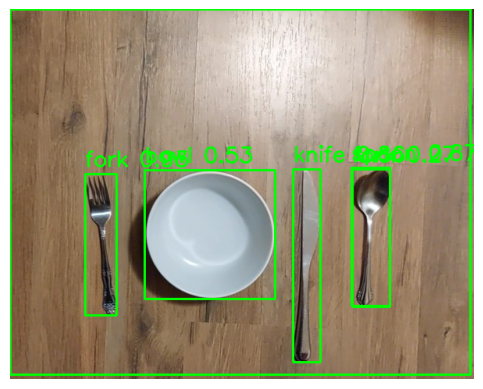

In [ ]:
import matplotlib.pyplot as plt
import cv2

model = YOLO('yolo11n.pt')  # load a pretrained YOLO detection model

results = model("/content/setting.jpg")  # predict on an image

# Assuming you want to display the first result
result = results[0]

# Plot the image with bounding boxes and labels
for *xyxy, conf, cls in result.boxes.data.tolist():
    x1, y1, x2, y2 = int(xyxy[0]), int(xyxy[1]), int(xyxy[2]), int(xyxy[3])
    label = f'{result.names[int(cls)]} {conf:.2f}'

    # Use OpenCV to draw the bounding box and label on the image
    cv2.rectangle(result.orig_img, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green bounding box
    cv2.putText(result.orig_img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(result.orig_img, cv2.COLOR_BGR2RGB)) # Convert BGR to RGB for matplotlib
plt.axis('off')
plt.show()


# Start of processing video with Yolo11.

In [ ]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

def process_video(video_path, model, frame_interval=1000):
    """
    Processes the video file, analyzing one frame per `frame_interval` milliseconds.

    :param video_path: Path to the video file
    :param model: YOLO model instance
    :param frame_interval: Time interval in milliseconds between frames (default: 1000ms = 1 second)
    """
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"Error opening video file: {video_path}")
        return

    fps = cap.get(cv2.CAP_PROP_FPS)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    duration = total_frames / fps if fps > 0 else 0  # Calculate total video duration in seconds

    print(f"Video FPS: {fps}, Total Frames: {total_frames}, Duration: {duration:.2f} seconds")

    current_time = 0  # Start at 0ms

    while current_time < duration * 1000:  # Convert duration to milliseconds
        cap.set(cv2.CAP_PROP_POS_MSEC, current_time)  # Move to the correct time
        ret, frame = cap.read()
        if not ret:
            break

        results = model(frame)
        result = results[0]

        for *xyxy, conf, cls in result.boxes.data.tolist():
            x1, y1, x2, y2 = int(xyxy[0]), int(xyxy[1]), int(xyxy[2]), int(xyxy[3])
            label = f'{result.names[int(cls)]} {conf:.2f}'
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

        # Display the frame
        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()

        current_time += frame_interval  # Move to the next timestamp

    cap.release()
    cv2.destroyAllWindows()

# Example usage
model = YOLO('yolo11n.pt')
video_path = "/content/setting.mp4"  # Replace with your video file path
process_video(video_path, model, frame_interval=1000)  # Process one frame per second


# HAND RECOGNITION

Additional content below.

In [ ]:
!pip install mediapipe opencv-python numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 27.1 MB/s eta 0:00:00


In [ ]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
from ultralytics import YOLO
import numpy as np

# Initialize MediaPipe Hands
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=False, max_num_hands=2, min_detection_confidence=0.5)
mp_drawing = mp.solutions.drawing_utils

def detect_gesture(hand_landmarks):
    """
    Detects if the hand is 'open' or 'pinching' using thumb and index finger distance.
    """
    if hand_landmarks:
        # Thumb tip (landmark 4) & Index fingertip (landmark 8)
        thumb_tip = np.array([hand_landmarks.landmark[4].x, hand_landmarks.landmark[4].y])
        index_tip = np.array([hand_landmarks.landmark[8].x, hand_landmarks.landmark[8].y])

        # Calculate Euclidean distance
        distance = np.linalg.norm(thumb_tip - index_tip)

        # Pinch threshold (adjust as needed)
        return "Pinching" if distance < 0.05 else "Open"

    return "Unknown"

def process_video(video_path, model, frame_interval=1000):
    """
    Processes the video, analyzing one frame per `frame_interval` milliseconds.

    :param video_path: Path to the video file
    :param model: YOLO model instance
    :param frame_interval: Time interval in milliseconds between frames (default: 1000ms = 1 second)
    """
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"Error opening video file: {video_path}")
        return

    fps = cap.get(cv2.CAP_PROP_FPS)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    duration = total_frames / fps if fps > 0 else 0  # Convert frames to seconds

    print(f"Video FPS: {fps}, Total Frames: {total_frames}, Duration: {duration:.2f} sec")

    current_time = 0  # Start at 0ms

    while current_time < duration * 1000:  # Convert duration to milliseconds
        cap.set(cv2.CAP_PROP_POS_MSEC, current_time)  # Move to next frame at correct time
        ret, frame = cap.read()
        if not ret:
            break

        # Convert BGR to RGB for MediaPipe
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        result = hands.process(rgb_frame)

        # Detect hand gesture
        gesture = "Unknown"
        if result.multi_hand_landmarks:
            gesture = detect_gesture(result.multi_hand_landmarks[0])

            # Draw hand landmarks
            for hand_landmarks in result.multi_hand_landmarks:
                mp_drawing.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)

        # YOLO object detection
        results = model(frame)
        yolo_result = results[0]

        for *xyxy, conf, cls in yolo_result.boxes.data.tolist():
            x1, y1, x2, y2 = int(xyxy[0]), int(xyxy[1]), int(xyxy[2]), int(xyxy[3])
            label = f'{yolo_result.names[int(cls)]} {conf:.2f}'
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

        # Display Gesture Recognition
        cv2.putText(frame, f"Gesture: {gesture}", (30, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

        # Show frame (processes one frame per `frame_interval`)
        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()

        current_time += frame_interval  # Move to the next second

    cap.release()
    cv2.destroyAllWindows()

# Load YOLO Model
model = YOLO('yolo11n.pt')

# Run video processing
video_path = "/content/setting.mp4"
process_video(video_path, model, frame_interval=1000)  # 1 frame per second


# Automatic Generation of Sequence of Actions
The following block gets the positions of each object with the gesture of the hand to save to a csv file.

In [ ]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
import numpy as np
import csv
from ultralytics import YOLO

# Initialize MediaPipe Hands
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=False, max_num_hands=2, min_detection_confidence=0.5)
mp_drawing = mp.solutions.drawing_utils

# Object Names in the Model
OBJECT_NAMES = ["bowl", "fork", "spoon", "knife"]
INCLUDE_HAND_GESTURE = True  # Set to False if you don't want to include hand data in the CSV

def detect_gesture(hand_landmarks):
    """Detects if the hand is 'open' or 'pinching' using thumb and index finger distance."""
    if hand_landmarks:
        thumb_tip = np.array([hand_landmarks.landmark[4].x, hand_landmarks.landmark[4].y])
        index_tip = np.array([hand_landmarks.landmark[8].x, hand_landmarks.landmark[8].y])
        distance = np.linalg.norm(thumb_tip - index_tip)
        return "Pinching" if distance < 0.05 else "Open"
    return "Unknown"

def process_video(video_path, model, frame_interval=1000, output_csv="object_positions.csv"):
    """
    Processes the video, analyzing one frame per `frame_interval` milliseconds.
    Saves object positions and gestures to a CSV file.

    :param video_path: Path to the video file
    :param model: YOLO model instance
    :param frame_interval: Time interval in milliseconds between frames (default: 1000ms = 1 sec)
    :param output_csv: Path to save CSV file
    """
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"Error opening video file: {video_path}")
        return

    fps = cap.get(cv2.CAP_PROP_FPS)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    duration = total_frames / fps if fps > 0 else 0

    print(f"Video FPS: {fps}, Total Frames: {total_frames}, Duration: {duration:.2f} sec")

    current_time = 0
    object_positions = []  # List to store object positions and gestures

    while current_time < duration * 1000:
        cap.set(cv2.CAP_PROP_POS_MSEC, current_time)  # Jump to next frame at correct time
        ret, frame = cap.read()
        if not ret:
            break

        # Convert BGR to RGB for MediaPipe
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        result = hands.process(rgb_frame)

        # Detect hand gesture
        gesture = "Unknown"
        if result.multi_hand_landmarks:
            gesture = detect_gesture(result.multi_hand_landmarks[0])

            # Draw hand landmarks
            for hand_landmarks in result.multi_hand_landmarks:
                mp_drawing.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)

        # YOLO object detection
        results = model(frame)
        yolo_result = results[0]

        # Initialize object coordinates dictionary
        frame_data = {"Frame": current_time // 1000}  # Convert ms to seconds
        for obj in OBJECT_NAMES:
            frame_data[f"x-{obj}"] = None
            frame_data[f"y-{obj}"] = None

        for *xyxy, conf, cls in yolo_result.boxes.data.tolist():
            x1, y1, x2, y2 = int(xyxy[0]), int(xyxy[1]), int(xyxy[2]), int(xyxy[3])
            center_x = (x1 + x2) / 2
            center_y = (y1 + y2) / 2
            detected_object = yolo_result.names[int(cls)]

            if detected_object in OBJECT_NAMES:
                frame_data[f"x-{detected_object}"] = center_x
                frame_data[f"y-{detected_object}"] = center_y

        # Add hand gesture if included
        if INCLUDE_HAND_GESTURE:
            frame_data["Hand Gesture"] = gesture

        object_positions.append(frame_data)  # Append all object positions from this frame
        print(f"Frame {frame_data['Frame']}: {frame_data}")  # Print positions

        # Display Gesture Recognition
        cv2.putText(frame, f"Gesture: {gesture}", (30, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

        # Show only 1 frame per second
        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()

        current_time += frame_interval  # Move to the next second

    cap.release()
    cv2.destroyAllWindows()

    # Save to CSV
    with open(output_csv, 'w', newline='') as csvfile:
        fieldnames = ["Frame"] + [f"x-{obj}" for obj in OBJECT_NAMES] + [f"y-{obj}" for obj in OBJECT_NAMES]
        if INCLUDE_HAND_GESTURE:
            fieldnames.append("Hand Gesture")

        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(object_positions)

    print(f"\nObject positions and gestures saved to {output_csv}")

# Example usage
model = YOLO('yolo11n.pt')
video_path = "/content/setting.mp4"
process_video(video_path, model, frame_interval=1000)  # Process 1 frame per second


This block of code loads the saved csv file to get the pinching phases and determine where the objects are moving.

In [ ]:
import pandas as pd
import numpy as np

# Load CSV file
csv_file = "object_positions.csv"
df = pd.read_csv(csv_file)

# Treat "Unknown" as "Open" for missing detections
df["Hand Gesture"] = df["Hand Gesture"].replace("Unknown", "Open")

# Object names to track
objects = ["knife", "spoon", "fork", "bowl"]

# Initialize variables for tracking pinching events
pinching_start = None
pinching_end = None
pinching_intervals = []

# Detect when pinching starts and ends
for i in range(1, len(df)):
    prev_gesture = df.loc[i - 1, "Hand Gesture"]
    curr_gesture = df.loc[i, "Hand Gesture"]

    if prev_gesture == "Open" and curr_gesture == "Pinching":
        pinching_start = df.loc[i, "Frame"]

    if prev_gesture == "Pinching" and curr_gesture == "Open":
        pinching_end = df.loc[i - 1, "Frame"]
        pinching_intervals.append((pinching_start, pinching_end))
        pinching_start, pinching_end = None, None  # Reset for next sequence

# Analyze each pinching interval
filtered_trajectories = {}

for start, end in pinching_intervals:
    print(f"\nTracking objects between frames {start} → {end}")

    # Store positions frame by frame during pinching
    movement_distances = {obj: 0 for obj in objects}
    start_positions = {}
    end_positions = {}
    previous_positions = {obj: None for obj in objects}

    # Iterate through all frames in the pinching period
    for frame_num in range(start, end + 1):
        frame_data = df[df["Frame"] == frame_num]

        if not frame_data.empty:
            for obj in objects:
                x, y = frame_data[f"x-{obj}"].values[0], frame_data[f"y-{obj}"].values[0]

                if not np.isnan(x) and not np.isnan(y):
                    # Store start position
                    if obj not in start_positions:
                        start_positions[obj] = (x, y)

                    # Compute movement distance from the previous frame
                    if previous_positions[obj] is not None:
                        prev_x, prev_y = previous_positions[obj]
                        movement_distances[obj] += np.sqrt((x - prev_x) ** 2 + (y - prev_y) ** 2)

                    previous_positions[obj] = (x, y)
                    end_positions[obj] = (x, y)  # Update end position

    # Find the object that moved the most
    most_moved_object = max(movement_distances, key=movement_distances.get)
    print(f"→ Object that moved the most: {most_moved_object} ({movement_distances[most_moved_object]:.2f} px)")

    # Store only start and end positions of the most moved object
    if most_moved_object in start_positions and most_moved_object in end_positions:
        filtered_trajectories[most_moved_object] = (start, end, start_positions[most_moved_object], end_positions[most_moved_object])

# Print movement trajectories (only start and end for the most moved object)
print("\nFiltered Object Movement Trajectories:")
for obj, (start_frame, end_frame, start_pos, end_pos) in filtered_trajectories.items():
    print(f"{obj.capitalize()} moved from {start_pos} at Frame {start_frame} to {end_pos} at Frame {end_frame}")



Tracking objects between frames 5 → 10
→ Object that moved the most: fork (607.05 px)

Tracking objects between frames 15 → 18
→ Object that moved the most: bowl (430.51 px)

Tracking objects between frames 23 → 24
→ Object that moved the most: knife (697.56 px)

Tracking objects between frames 31 → 34
→ Object that moved the most: spoon (352.57 px)

Filtered Object Movement Trajectories:
Fork moved from (634.5, 884.0) at Frame 5 to (1063.0, 454.0) at Frame 10
Bowl moved from (909.5, 828.0) at Frame 15 to (743.5, 434.0) at Frame 18
Knife moved from (504.5, 825.5) at Frame 23 to (1051.0, 392.0) at Frame 24
Spoon moved from (501.5, 862.5) at Frame 31 to (247.0, 618.5) at Frame 34


Now the code will generate a sequence of actions from the saved trajectories, starting from an initial position for the robot.

In [ ]:
# Robot starts at (0,0)
robot_position = (0, 0)
robot_actions = []

# Generate movement sequence for the robot using filtered_trajectories
for obj, (start_frame, end_frame, initial_pos, final_pos) in filtered_trajectories.items():
    # Move to object initial position
    robot_actions.append(f"Move from {robot_position} to {initial_pos}")

    # Pick up object
    robot_actions.append(f"Pick {obj} at {initial_pos}")

    # Move to object final position
    robot_actions.append(f"Move {obj} from {initial_pos} to {final_pos}")

    # Place object
    robot_actions.append(f"Place {obj} at {final_pos}")

    # Update robot position to the final object position
    robot_position = final_pos

# After all objects are placed, return to the initial position (0,0)
robot_actions.append(f"Move from {robot_position} to (0, 0)")

# Print robot action sequence
print("\nRobot Action Sequence:")
for action in robot_actions:
    print(action)



Robot Action Sequence:
Move from (0, 0) to (634.5, 884.0)
Pick fork at (634.5, 884.0)
Move fork from (634.5, 884.0) to (1063.0, 454.0)
Place fork at (1063.0, 454.0)
Move from (1063.0, 454.0) to (909.5, 828.0)
Pick bowl at (909.5, 828.0)
Move bowl from (909.5, 828.0) to (743.5, 434.0)
Place bowl at (743.5, 434.0)
Move from (743.5, 434.0) to (504.5, 825.5)
Pick knife at (504.5, 825.5)
Move knife from (504.5, 825.5) to (1051.0, 392.0)
Place knife at (1051.0, 392.0)
Move from (1051.0, 392.0) to (501.5, 862.5)
Pick spoon at (501.5, 862.5)
Move spoon from (501.5, 862.5) to (247.0, 618.5)
Place spoon at (247.0, 618.5)
Move from (247.0, 618.5) to (0, 0)
